# Analysis of Capomulin versus other treatment regimens
**Author:** Leonard Paul-Kamara

## Analysis Objectives

This project involves analysis of the effect of cancer treatment drugs on the volume size of squamous cell carcinoma (scc). The drugs were administered for 45 days to 249 mice identified with scc. Volume size of the tumors were recorded throughout the 45 days period at different time points.
The main objective is to compare Pymaceutical's drug of interest Capomulin, to other drug regimen involved in the trial.  
Three observations from analysis of the data include:

1. Male mouse population make up about 50.6% while that of the female is 49.4%.
2. A decrease of tumor volume as time point progresses as observed in mouse s185 treated with Capomulin.
3. Positive correlation between average tumor volume and weight as seen in the scatter plot "Relationship between Weight and Average Tumor Volume". 

Detailed analysis of the data generated from the trial is seen below.

## Qualitative Analysis

### Import dependencies and setu

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [196]:
# Inspect count and data type of columns
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [197]:
# Checking the number of mice.
num_mice = mouse_df['Mouse ID'].nunique()
num_mice

249

In [198]:
# Check for duplicate mouse 
duplicate = mouse_df.duplicated().value_counts()
duplicate

False    1892
True        1
dtype: int64

In [199]:
# Extract rows with duplicate mouse information
duplicated = mouse_df[mouse_df.duplicated()]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [200]:
# Drop duplicate mouse
mouse_df = mouse_df.drop_duplicates(keep='first')

# Confirm duplicate mouse is dropped
duplicates_new = mouse_df.duplicated().value_counts()
duplicates_new

False    1892
dtype: int64

In [201]:
# Re-Inspect data type and count of column values
mouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1892 non-null   object 
 1   Drug Regimen        1892 non-null   object 
 2   Sex                 1892 non-null   object 
 3   Age_months          1892 non-null   int64  
 4   Weight (g)          1892 non-null   int64  
 5   Timepoint           1892 non-null   int64  
 6   Tumor Volume (mm3)  1892 non-null   float64
 7   Metastatic Sites    1892 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.0+ KB


In [202]:
# Create a groupby object of drug regimen
drug_groupby = mouse_df.groupby('Drug Regimen')

# Mean Tumor Volume for each drug regimen
tumor_volume_mean = drug_groupby['Tumor Volume (mm3)'].mean()

# Median Tumor Volume for each drug regimen
tumor_volume_median = drug_groupby['Tumor Volume (mm3)'].median()

# Variance of Tumor Volume for each drug regimen
tumor_volume_variance = drug_groupby['Tumor Volume (mm3)'].var()

# Standard Deviation of Tumor Volume for each drug regimen
tumor_volume_std = drug_groupby['Tumor Volume (mm3)'].std()

# SEM of Tumor Volume for each drug regimen
tumor_volume_sem = drug_groupby['Tumor Volume (mm3)'].sem()

# Generate  summary Statistics Table
summary_statistics = pd.DataFrame({'Mean': tumor_volume_mean,
                                  'Median': tumor_volume_median, 
                                  'Variance': tumor_volume_variance, 
                                  'std': tumor_volume_std, 
                                  'sem': tumor_volume_sem})

summary_statistics

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


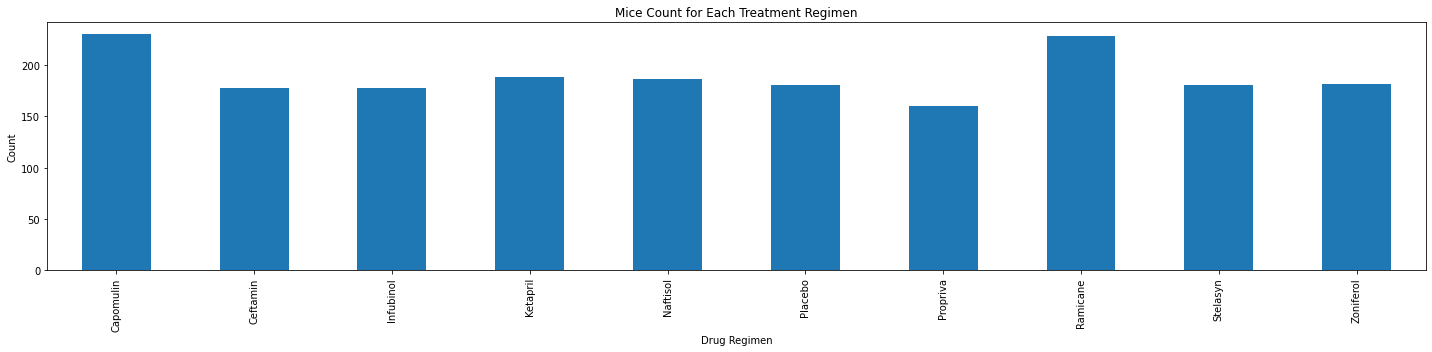

In [203]:
# Bar plot showing count of mice for each treatment regimen
# Calculate Mice count
mouse_count = drug_groupby['Mouse ID'].count()

# Create bar Plot with pandas
mouse_count.plot(kind='bar', figsize=(20, 5))
# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

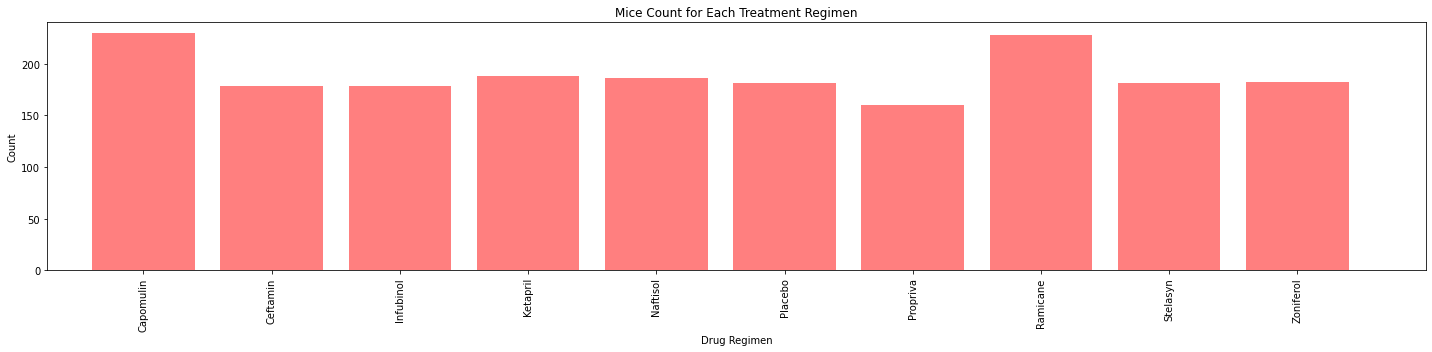

In [204]:
# Create bar plot using matplotlib

# Set x axis and tick locations
x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,5))

# Create the plot
plt.bar(x_axis, mouse_count, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+10)

# Set a Title and labels
plt.title('Mice Count for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')

# Show the grap
plt.tight_layout()
plt.show()


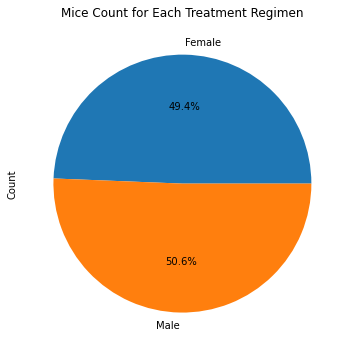

In [205]:
# Count of Mice Gender

# Create a groupby object of gender
mouse_gender = mouse_df.groupby('Sex')

# Count of Sex
mouse_sex_count = mouse_gender['Mouse ID'].count()

# Create Pie Plot using pandas
mouse_sex_count.plot(kind='pie', figsize=(20, 5), autopct='%1.1f%%')

# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

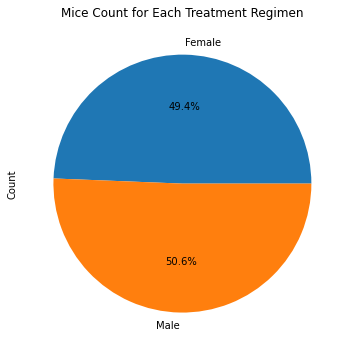

In [206]:
# Create pie plot using matplotlib
plt.figure(figsize=(20, 5))
labels = ['Female', 'Male']
plt.pie(mouse_sex_count, autopct="%1.1f%%", labels=labels)
# Set a title for the chart
plt.ylabel('Count')
plt.title('Mice Count for Each Treatment Regimen')
plt.tight_layout()
plt.show()

In [207]:
# mouse_df.head()

In [208]:
# Create data frame of the four promising drug regimen
df_four = mouse_df.loc[(mouse_df['Drug Regimen']=='Capomulin') | (mouse_df['Drug Regimen']=='Ramicane') | (mouse_df['Drug Regimen']=='Infubinol') | (mouse_df['Drug Regimen']=='Ceftamin')]

In [209]:
# Create a groupby object grouping by Mouse ID
mouse_grouped = df_four.groupby('Mouse ID')

# Select maximum timepoint for each drug regimen by mouse
max_time_point = mouse_grouped['Timepoint'].max()
max_time_point.reset_index().head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [210]:
# Merge max_time_point dataframe with original dataframe 
final_volume_df = pd.merge(max_time_point, mouse_df, on=['Mouse ID', 'Timepoint'])
final_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [211]:
four_drugs = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']
tumor_volume = []
data = []
for drug in four_drugs:
    tumor_volume.append(final_volume_df.loc[final_volume_df['Drug Regimen']==drug]['Tumor Volume (mm3)'])
    
    lowerq = np.quantile(tumor_volume, 0.25)
    secondq = np.quantile(tumor_volume, 0.5)
    upperq = np.quantile(tumor_volume, 0.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)   
    
        
    data.append((drug, lowerq, secondq, upperq, iqr, lower_bound, upper_bound))
cols = ['Drug Regimen', 'First Quartile', 'Second Quartile', 'Third quartile', 'IQR', 'Lower Bound', 'Upper Bound']
   
summary_table_stats = pd.DataFrame(data, columns=cols)               
summary_table_stats

,Drug Regimen,First Quartile,Second Quartile,Third quartile,IQR,Lower Bound,Upper Bound
0,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
1,Ceftamin,51.888160,60.008568,64.551169,12.663009,32.893646,83.545683
2,Ramicane,39.734686,51.542431,61.983151,22.248465,6.361989,95.355848
3,Capomulin,37.187744,45.000000,59.930262,22.742518,3.073967,94.044039


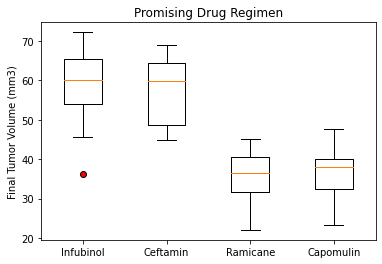

In [212]:
red_circle = dict(markerfacecolor='r', marker='o')    
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels=four_drugs, flierprops=red_circle)
plt.show()

In [213]:
mouse_capomulin = mouse_df.loc[mouse_df['Drug Regimen']=='Capomulin']
mouse_capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [214]:
# Select a female mouse Mouse ID is s185
mouse_s185 = mouse_df.loc[mouse_df['Mouse ID']=='s185']
mouse_s185.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


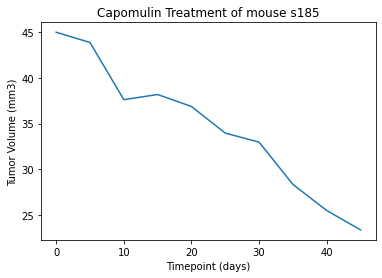

In [215]:
time = mouse_s185['Timepoint']
tumor_vol = mouse_s185['Tumor Volume (mm3)']
plt.plot(time, tumor_vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.title('Capomulin Treatment of mouse s185')

plt.show()

In [216]:
capomulin_grouped = mouse_capomulin.groupby('Mouse ID')
avg_mean_vol = capomulin_grouped[['Weight (g)', 'Tumor Volume (mm3)']].mean()
capomulin_grouped_df = pd.DataFrame(avg_mean_vol)
capomulin_grouped_df.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


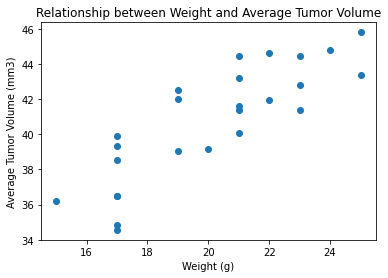

In [217]:
# Scatter plot of mouse weight versus tumor volume for the capomulin treatment regimen
x_values = capomulin_grouped_df['Weight (g)']
y_values = capomulin_grouped_df['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Weight and Average Tumor Volume')
plt.show()

The r-squared is: 0.7088568047708717
The equation of the line is: y = 0.95x + 21.55


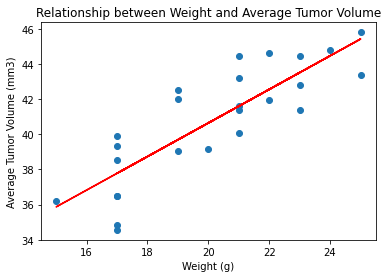

In [218]:
weight = capomulin_grouped_df['Weight (g)']
tumor_volume = capomulin_grouped_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Weight and Average Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")
plt.show()